In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library

from bs4 import BeautifulSoup

In [3]:
url = "https://emlakkulisi.com/istanbulda-ortalama-kira-ve-geri-donus-sureleri/631190"
response = requests.get(url)
soup = BeautifulSoup(response.text ,'lxml')
table = soup.find('table')

ix = 0
cols = ["Municipality", "Unit Rent"]
# Unit rent is TL/m2
df = pd.DataFrame(columns=cols, index = np.arange(0,45))

for row in table.findAll('tr')[1:]:
    name = row.findAll("td")[0]
    rent = row.findAll("td")[1]
    df.iloc[ix, 0] = name.text.strip()
    df.iloc[ix, 1] = float(rent.text.strip())
    ix = ix + 1

df = df.dropna().sort_values(by="Unit Rent", ascending=False)
df

,Municipality,Unit Rent
11,Sarıyer,29
2,Beşiktaş,27
4,Beyoğlu,27
1,Bakırköy,24
14,Şişli,22
9,Kadıköy,20
0,Adalar,19
6,Eyüpsultan,19
7,Fatih,18
16,Zeytinburnu,18


In [4]:
url2 = "https://tr.wikipedia.org/wiki/%C4%B0stanbul%27un_il%C3%A7eleri"
response = requests.get(url2)
soup = BeautifulSoup(response.text ,'lxml')
table = soup.findAll('table' , {'class' : 'wikitable'})

ix = 3
ix_2 = 0
cols = ["Municipality", "Population"]
# Unit rent is TL/m2
df_pop = pd.DataFrame(columns=cols, index = np.arange(0,39))

for row in table[0].findAll('tr'):
    if (ix - 1) % 3 == 0:
        name = row.findAll("td")[1]
        pop = row.findAll("td")[3]
        df_pop.iloc[ix_2, 0] = name.text.strip()
        df_pop.iloc[ix_2, 1] = int(pop.text.strip().replace(".", "").replace(",", ""))
        ix_2 = ix_2 + 1
    ix = ix + 1
df_pop

,Municipality,Population
0,Adalar,15623
1,Arnavutköy,148419
2,Ataşehir,345588
3,Avcılar,322190
4,Bağcılar,757162
5,Bahçelievler,571711
6,Bakırköy,214821
7,Başakşehir,193750
8,Bayrampaşa,272196
9,Beşiktaş,191513


In [5]:
df_merged = pd.merge(df, df_pop, on="Municipality")
df_merged["Unit Rent Per Capita"] = df_merged["Unit Rent"] / df_merged["Population"]
df_merged

,Municipality,Unit Rent,Population,Unit Rent Per Capita
0,Sarıyer,29,276407,0.000104918
1,Beşiktaş,27,191513,0.000140983
2,Beyoğlu,27,247256,0.000109199
3,Bakırköy,24,214821,0.000111721
4,Şişli,22,314684,6.99114e-05
5,Kadıköy,20,550801,3.63108e-05
6,Adalar,19,15623,0.00121616
7,Eyüpsultan,19,317695,5.98058e-05
8,Fatih,18,455498,3.95172e-05
9,Zeytinburnu,18,288743,6.23392e-05


In [157]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="random app")

for ix, val in df_merged.iterrows():
    location = geolocator.geocode(val["Municipality"])
    df_merged.loc[ix,"Latitude"] = location.latitude
    df_merged.loc[ix,"Longitude"] = location.longitude

In [161]:
# Sile: 41°	10.2'	29°	34.8'
# df_merged.loc[19, "Latitude"] = 41 + 10.2/60
# df_merged.loc[19, "Longitude"] = 29 + 34.8/60
# Kartal: 40° 53´ 14.5212" ve 29° 11´ 21.6528
# df_merged.loc[21, "Latitude"] = 40 + 53/60 + 14.5212/3600
# df_merged.loc[21, "Longitude"] = 29 + 11/60 + 21.6528/3600

df_merged

,Municipality,Unit Rent,Population,Unit Rent Per Capita,Latitude,Longitude
0,Sarıyer,29,276407,0.000104918,41.170603,29.054363
1,Beşiktaş,27,191513,0.000140983,41.042847,29.007528
2,Beyoğlu,27,247256,0.000109199,41.028423,28.973681
3,Bakırköy,24,214821,0.000111721,40.983541,28.867974
4,Şişli,22,314684,6.99114e-05,41.061273,28.985020
5,Kadıköy,20,550801,3.63108e-05,40.991572,29.027017
6,Adalar,19,15623,0.00121616,40.876259,29.091027
7,Eyüpsultan,19,317695,5.98058e-05,41.046044,28.925324
8,Fatih,18,455498,3.95172e-05,41.019297,28.947802
9,Zeytinburnu,18,288743,6.23392e-05,40.988118,28.903635


In [163]:
from scipy.interpolate import interp1d

latitude  = 41.015137
longitude =  28.979530
scale = interp1d([15000, 800000],[1,14])
# create map of New York using latitude and longitude values
map_ist = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, pop, mun in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Population'], df_merged['Municipality']):
    label = '{}, population: {}'.format(mun, pop)
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker(
        [lat, lng],
        radius= int(scale(pop)),
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ist)  
    
map_ist

In [164]:
# location = geolocator.geocode("Beykoz", geometry="geojson")
# print(location.raw)
geo_data = {}
geo_arr = []
for i in df_merged["Municipality"].values:
    location = geolocator.geocode(i, geometry="geojson")
    l = location.raw
    l["id"] = i
    geo_arr.append(l)
geo_data = {"type" : "FeatureCollection", "features" : geo_arr}
# geo_data

In [13]:
geo_data

{'features': [{'boundingbox': ['41.0811127',
    '41.262382',
    '28.9325702',
    '29.1162566'],
   'class': 'boundary',
   'display_name': 'Sarıyer, İstanbul, Marmara Bölgesi, Türkiye',
   'geojson': {'coordinates': [[[28.9325702, 41.2319768],
      [28.9327097, 41.2312991],
      [28.9330852, 41.2313313],
      [28.9336216, 41.2312345],
      [28.9339645, 41.2309639],
      [28.934555, 41.230468],
      [28.9351648, 41.2295893],
      [28.9356704, 41.2266744],
      [28.9349121, 41.2249634],
      [28.9353333, 41.2242663],
      [28.9370184, 41.2253436],
      [28.9370184, 41.2243931],
      [28.9363444, 41.2231256],
      [28.9371027, 41.2223018],
      [28.9382823, 41.2234425],
      [28.938535, 41.222175],
      [28.9405572, 41.2223018],
      [28.9417368, 41.2214779],
      [28.9450227, 41.2216681],
      [28.9458653, 41.2219215],
      [28.9470449, 41.2219215],
      [28.9481592, 41.2216421],
      [28.9488142, 41.2214779],
      [28.9499938, 41.2204639],
      [28.9507574, 41

In [165]:
map_ist2 = folium.Map(location=[latitude, longitude], zoom_start=10)

map_ist2.choropleth(
    geo_data=geo_data,
    name='choropleth',
    data=df_merged,
    columns=['Municipality', 'Population'],
    key_on='feature.properties.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
#     legend_name='Unemployment Rate (%)'
).add_to(map_ist2)

folium.LayerControl().add_to(map_ist2)

map_ist2

AttributeError: 'NoneType' object has no attribute 'add_to'

### Let's start getting venue data from Foursquare

In [17]:
CLIENT_ID = 'CVUBX0BIOPEUVR0OKKLARW3QWSDSGWFU0SXAROMZURM5BUZP' # your Foursquare ID
CLIENT_SECRET = 'AOYYJ43MWTXP4PWEOIO0GMOQWC3PT5GNS2NTW00URIF2P3NH' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CVUBX0BIOPEUVR0OKKLARW3QWSDSGWFU0SXAROMZURM5BUZP
CLIENT_SECRET:AOYYJ43MWTXP4PWEOIO0GMOQWC3PT5GNS2NTW00URIF2P3NH


In [18]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=CVUBX0BIOPEUVR0OKKLARW3QWSDSGWFU0SXAROMZURM5BUZP&client_secret=AOYYJ43MWTXP4PWEOIO0GMOQWC3PT5GNS2NTW00URIF2P3NH&v=20180604&ll=41.015137,28.97953&radius=500&limit=100'

In [166]:
from pandas.io.json import json_normalize
results = requests.get(url).json()
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Barbera Boutique Hotel,Hotel,41.014433,28.978280
1,Şehr-i Payitaht Cafe & Restaurant,Café,41.015777,28.977437
2,Sepetçiler Kasrı,Historic Site,41.016247,28.982060
3,DoubleTree by Hilton,Hotel,41.013524,28.978278
4,Sirkeci Garı,Train Station,41.014949,28.976891


In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
ist_venues = getNearbyVenues(names=df_merged['Municipality'],
                                   latitudes=df_merged['Latitude'],
                                   longitudes=df_merged['Longitude']
                                  )

Sarıyer
Beşiktaş
Beyoğlu
Bakırköy
Şişli
Kadıköy
Adalar
Eyüpsultan
Fatih
Zeytinburnu
Ataşehir
Üsküdar
Başakşehir
Küçükçekmece
Beykoz
Maltepe
Bayrampaşa
Güngören
Bahçelievler
Şile
Ümraniye
Kartal
Esenyurt
Beylikdüzü
Esenler
Gaziosmanpaşa
Bağcılar
Avcılar
Tuzla
Büyükçekmece
Pendik
Çekmeköy
Sultangazi
Silivri
Sultanbeyli
Sancaktepe
Arnavutköy
Çatalca


In [22]:
ist_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sarıyer,41.170603,29.054363,Hayri Pastanesi Sarıyer,41.171143,29.053734,Bakery
1,Sarıyer,41.170603,29.054363,Nejat Uygur Sahnesi,41.170829,29.053971,Theater
2,Sarıyer,41.170603,29.054363,paşa börek,41.170415,29.054317,Café
3,Sarıyer,41.170603,29.054363,Furkan Börekçisi,41.169369,29.056952,Bakery
4,Sarıyer,41.170603,29.054363,Şuşoğlu Pastanesi,41.168826,29.055909,Cupcake Shop


In [23]:
print('There are {} uniques categories.'.format(len(ist_venues['Venue Category'].unique())))

There are 270 uniques categories.


In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# one hot encoding
ist_onehot = pd.get_dummies(ist_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ist_onehot['Neighborhood'] = ist_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ist_onehot.columns[-1]] + list(ist_onehot.columns[:-1])
ist_onehot = ist_onehot[fixed_columns]

ist_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Trail,Bistro,Boat or Ferry,Bookstore,Borek Place,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Candy Store,Caribbean Restaurant,Castle,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Cigkofte Place,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Classroom,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Conference,Convenience Store,Cosmetics Shop,Coworking Space,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doner Restaurant,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fish Taverna,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Forest,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,General Entertainment,General Travel,Gift Shop,Go Kart Track,Gourmet Shop,Gozleme Place,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,Ice Cream Shop,Indie Movie Theater,Insurance Office,Internet Cafe,Intersection,Italian Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kofte Place,Kokoreç Restaurant,Kumpir Restaurant,Library,Lighthouse,Lingerie Store,Lounge,Manti Place,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Meyhane,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mosque,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Nightclub,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Event Space,Outdoor Sculpture,Outlet Store,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Pet Café,Pet Store,Pharmacy,Pide Place,Pie Shop,Piercing Parlor,Pilavcı,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Public Art,Radio Station,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Souvenir Shop,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,State / Provincial Park,Stationery Store,Steakhouse,Street Art,Supermarket,Surf Spot,Sushi Restaurant,Syrian Restaurant,Taco Place,Tantuni Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tram Station,Transportation Service,Tree,Tunnel,Turkish Home Cooking Restaurant,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Store,Volleyball Court,Water Park,Waterfront,Wedding Hall,Wine Bar,Wings Joint,Women's Store,Çöp Şiş Place
0,Sarıyer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [25]:
ist_grouped = ist_onehot.groupby('Neighborhood').mean().reset_index()
ist_grouped

,Neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Trail,Bistro,Boat or Ferry,Bookstore,Borek Place,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Candy Store,Caribbean Restaurant,Castle,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Cigkofte Place,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Classroom,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Conference,Convenience Store,Cosmetics Shop,Coworking Space,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doner Restaurant,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fish Taverna,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Forest,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,General Entertainment,General Travel,Gift Shop,Go Kart Track,Gourmet Shop,Gozleme Place,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,Ice Cream Shop,Indie Movie Theater,Insurance Office,Internet Cafe,Intersection,Italian Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kofte Place,Kokoreç Restaurant,Kumpir Restaurant,Library,Lighthouse,Lingerie Store,Lounge,Manti Place,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Meyhane,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mosque,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Nightclub,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Event Space,Outdoor Sculpture,Outlet Store,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Pet Café,Pet Store,Pharmacy,Pide Place,Pie Shop,Piercing Parlor,Pilavcı,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Public Art,Radio Station,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Souvenir Shop,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,State / Provincial Park,Stationery Store,Steakhouse,Street Art,Supermarket,Surf Spot,Sushi Restaurant,Syrian Restaurant,Taco Place,Tantuni Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tram Station,Transportation Service,Tree,Tunnel,Turkish Home Cooking Restaurant,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Store,Volleyball Court,Water Park,Waterfront,Wedding Hall,Wine Bar,Wings Joint,Women's Store,Çöp Şiş Place
0,Adalar,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.062500,0.062500,0.000000,0.000000,0.000000,0.0625,0.000000,0.062500,0.000000,0.000000,0.000000,0

In [26]:
num_top_venues = 10

for hood in ist_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = ist_grouped[ist_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adalar----
             venue  freq
0             Café  0.19
1       University  0.06
2         Mountain  0.06
3            Beach  0.06
4  Bed & Breakfast  0.06
5   History Museum  0.06
6           Museum  0.06
7       Bike Trail  0.06
8            Hotel  0.06
9             Pool  0.06


----Arnavutköy----
                  venue  freq
0                  Café  0.19
1            Restaurant  0.04
2    Turkish Restaurant  0.04
3            Steakhouse  0.03
4           Kofte Place  0.03
5      Kebab Restaurant  0.03
6     Electronics Store  0.03
7                Arcade  0.03
8            Bagel Shop  0.03
9  Gym / Fitness Center  0.03


----Ataşehir----
                venue  freq
0                Café  0.15
1          Restaurant  0.12
2  Italian Restaurant  0.05
3    Kebab Restaurant  0.05
4              Lounge  0.05
5         Coffee Shop  0.05
6              Bistro  0.05
7              Bakery  0.05
8          Steakhouse  0.05
9    Doner Restaurant  0.05


----Avcılar----
              

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [28]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ist_grouped['Neighborhood']

for ind in np.arange(ist_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ist_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adalar,Café,Boat or Ferry,University,Beach,Tennis Court,Bed & Breakfast,Mountain,Harbor / Marina,Bike Trail,Surf Spot
1,Arnavutköy,Café,Turkish Restaurant,Restaurant,Coffee Shop,Pizza Place,Dessert Shop,Steakhouse,Electronics Store,Fast Food Restaurant,Bagel Shop
2,Ataşehir,Café,Restaurant,Steakhouse,Coffee Shop,Bistro,Kebab Restaurant,Lounge,Bakery,Italian Restaurant,Doner Restaurant
3,Avcılar,Café,Dessert Shop,Turkish Restaurant,Bar,Breakfast Spot,Gym / Fitness Center,Restaurant,Steakhouse,Coffee Shop,Bistro
4,Bahçelievler,Café,Dessert Shop,Bakery,Turkish Restaurant,Gym,Gaming Cafe,Pide Place,Cosmetics Shop,Ice Cream Shop,Steakhouse


In [151]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

ist_grouped_clustering = ist_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ist_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 3, 0, 0, 3, 3, 0, 3, 3])

In [167]:
# add clustering labels
# neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted["Cluster Labels"] =  kmeans.labels_
ist_merged = df_merged

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
ist_merged = ist_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Municipality')

ist_merged.head() # check the last columns!

,Municipality,Unit Rent,Population,Unit Rent Per Capita,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Sarıyer,29,276407,0.000104918,41.170603,29.054363,3,Café,Bakery,Seafood Restaurant,Soccer Stadium,Burger Joint,Turkish Restaurant,Steakhouse,Restaurant,Mobile Phone Shop,Diner
1,Beşiktaş,27,191513,0.000140983,41.042847,29.007528,3,Coffee Shop,Bar,Café,Restaurant,Pub,Seafood Restaurant,Hookah Bar,Bookstore,Gastropub,Theater
2,Beyoğlu,27,247256,0.000109199,41.028423,28.973681,0,Café,Restaurant,Hotel,Coffee Shop,Cocktail Bar,Bar,Turkish Restaurant,Meyhane,Italian Restaurant,Art Gallery
3,Bakırköy,24,214821,0.000111721,40.983541,28.867974,3,Gym,Turkish Restaurant,Café,Tennis Court,Bakery,Steakhouse,Spa,Park,Athletics & Sports,Music Venue
4,Şişli,22,314684,6.99114e-05,41.061273,28.985020,3,Hotel,Café,Restaurant,Turkish Restaurant,Gym,Coffee Shop,Steakhouse,Burger Joint,Pizza Place,Fast Food Restaurant


In [153]:
ist_merged["Cluster Labels"].unique()

array([3, 0, 1, 2, 4], dtype=int64)

In [168]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)
scale = interp1d([15000, 800000],[1,1000])
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, popul in zip(ist_merged['Latitude'], ist_merged['Longitude'], ist_merged['Municipality'], ist_merged['Cluster Labels'], ist_merged['Population']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + ' Population:  ' + str(popul), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=int(scale(popul)**0.5),
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster)],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

In [83]:
ist_merged.loc[ist_merged['Cluster Labels'] == 3, ist_merged.columns[[0,1,2,3] + list(range(5, ist_merged.shape[1]))]]

,Municipality,Unit Rent,Population,Unit Rent Per Capita,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Sarıyer,29,276407,0.000104918,29.054363,3,Café,Bakery,Seafood Restaurant,Soccer Stadium,Burger Joint,Turkish Restaurant,Steakhouse,Restaurant,Mobile Phone Shop,Diner
1,Beşiktaş,27,191513,0.000140983,29.007528,3,Coffee Shop,Bar,Café,Restaurant,Pub,Seafood Restaurant,Hookah Bar,Bookstore,Gastropub,Theater
3,Bakırköy,24,214821,0.000111721,28.867974,3,Gym,Turkish Restaurant,Café,Tennis Court,Bakery,Steakhouse,Spa,Park,Athletics & Sports,Music Venue
4,Şişli,22,314684,6.99114e-05,28.985020,3,Hotel,Café,Restaurant,Turkish Restaurant,Gym,Coffee Shop,Steakhouse,Burger Joint,Pizza Place,Fast Food Restaurant
7,Eyüpsultan,19,317695,5.98058e-05,28.925324,3,Café,Turkish Restaurant,Gym,Park,Pharmacy,Plaza,Bakery,Grocery Store,Gym / Fitness Center,Breakfast Spot
8,Fatih,18,455498,3.95172e-05,28.947802,3,Café,Dessert Shop,Turkish Restaurant,Restaurant,Tea Room,Bridal Shop,Women's Store,Coffee Shop,Clothing Store,Mobile Phone Shop
9,Zeytinburnu,18,288743,6.23392e-05,28.903635,3,Café,Turkish Restaurant,Clothing Store,Restaurant,Hookah Bar,Steakhouse,Ice Cream Shop,Gym,Dessert Shop,Gym / Fitness Center
10,Ataşehir,16,345588,4.62979e-05,29.106720,3,Café,Restaurant,Steakhouse,Coffee Shop,Bistro,Kebab Restaurant,Lounge,Bakery,Italian Restaurant,Doner Restaurant
12,Başakşehir,15,193750,7.74194e-05,28.806163,3,Café,Restaurant,Deli / Bodega,Çöp Şiş Place,Convenience Store,Boutique,Breakfast Spot,Snack Place,Castle,Salon / Barbershop
13,Küçükçekmece,15,662566,2.26393e-05,28.780889,3,Turkish Restaurant,Café,Dessert Shop,Seafood Restaurant,Soup Place,Gym / Fitness Center,Sculpture Garden,Shopping Mall,Electronics Store,Bakery


In [85]:
ist_merged.sort_values(by="Population", ascending=False)

,Municipality,Unit Rent,Population,Unit Rent Per Capita,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Bağcılar,12,757162,1.58487e-05,41.033899,28.857898,0,Café,Gym,Coffee Shop,Turkish Restaurant,Dessert Shop,Hookah Bar,Steakhouse,Arcade,Fast Food Restaurant,Gym / Fitness Center
20,Ümraniye,12,672359,1.78476e-05,41.022269,29.090073,3,Coffee Shop,Bakery,Café,Bookstore,Jewelry Store,Shoe Store,Tea Room,Burger Joint,Restaurant,Turkish Restaurant
13,Küçükçekmece,15,662566,2.26393e-05,41.000214,28.780889,3,Turkish Restaurant,Café,Dessert Shop,Seafood Restaurant,Soup Place,Gym / Fitness Center,Sculpture Garden,Shopping Mall,Electronics Store,Bakery
22,Esenyurt,12,624733,1.92082e-05,41.034240,28.680018,0,Café,Mobile Phone Shop,Hotel,Eastern European Restaurant,Restaurant,Grocery Store,Fast Food Restaurant,Men's Store,Electronics Store,Bistro
18,Bahçelievler,14,571711,2.44879e-05,41.000290,28.863745,0,Café,Dessert Shop,Bakery,Turkish Restaurant,Gym,Gaming Cafe,Pide Place,Cosmetics Shop,Ice Cream Shop,Steakhouse
5,Kadıköy,20,550801,3.63108e-05,40.991572,29.027017,0,Café,Coffee Shop,Seafood Restaurant,Restaurant,Bar,Pub,Nightclub,Theater,Cosmetics Shop,Bookstore
11,Üsküdar,16,529550,3.02143e-05,41.024905,29.017528,0,Café,Coffee Shop,Turkish Restaurant,Turkish Home Cooking Restaurant,Historic Site,Restaurant,Seafood Restaurant,Sporting Goods Shop,Pilavcı,Burger Joint
30,Pendik,10,520486,1.92128e-05,40.876589,29.233342,3,Café,Turkish Restaurant,Fast Food Restaurant,Restaurant,Dessert Shop,Jewelry Store,Fried Chicken Joint,Clothing Store,Art Gallery,Breakfast Spot
24,Esenler,12,468448,2.56165e-05,41.033254,28.890953,0,Café,Gym / Fitness Center,Gym,Soccer Stadium,Turkish Restaurant,BBQ Joint,Bakery,Cocktail Bar,Basketball Court,Steakhouse
25,Gaziosmanpaşa,12,464109,2.5856e-05,41.057526,28.915650,0,Café,Turkish Restaurant,Restaurant,Snack Place,Pizza Place,Cosmetics Shop,Arcade,Steakhouse,Gym,Gym / Fitness Center


In [86]:
ist_merged.sort_values(by="Unit Rent", ascending=False)

,Municipality,Unit Rent,Population,Unit Rent Per Capita,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Sarıyer,29,276407,0.000104918,41.170603,29.054363,3,Café,Bakery,Seafood Restaurant,Soccer Stadium,Burger Joint,Turkish Restaurant,Steakhouse,Restaurant,Mobile Phone Shop,Diner
1,Beşiktaş,27,191513,0.000140983,41.042847,29.007528,3,Coffee Shop,Bar,Café,Restaurant,Pub,Seafood Restaurant,Hookah Bar,Bookstore,Gastropub,Theater
2,Beyoğlu,27,247256,0.000109199,41.028423,28.973681,0,Café,Restaurant,Hotel,Coffee Shop,Cocktail Bar,Bar,Turkish Restaurant,Meyhane,Italian Restaurant,Art Gallery
3,Bakırköy,24,214821,0.000111721,40.983541,28.867974,3,Gym,Turkish Restaurant,Café,Tennis Court,Bakery,Steakhouse,Spa,Park,Athletics & Sports,Music Venue
4,Şişli,22,314684,6.99114e-05,41.061273,28.985020,3,Hotel,Café,Restaurant,Turkish Restaurant,Gym,Coffee Shop,Steakhouse,Burger Joint,Pizza Place,Fast Food Restaurant
5,Kadıköy,20,550801,3.63108e-05,40.991572,29.027017,0,Café,Coffee Shop,Seafood Restaurant,Restaurant,Bar,Pub,Nightclub,Theater,Cosmetics Shop,Bookstore
6,Adalar,19,15623,0.00121616,40.876259,29.091027,0,Café,Boat or Ferry,University,Beach,Tennis Court,Bed & Breakfast,Mountain,Harbor / Marina,Bike Trail,Surf Spot
7,Eyüpsultan,19,317695,5.98058e-05,41.046044,28.925324,3,Café,Turkish Restaurant,Gym,Park,Pharmacy,Plaza,Bakery,Grocery Store,Gym / Fitness Center,Breakfast Spot
9,Zeytinburnu,18,288743,6.23392e-05,40.988118,28.903635,3,Café,Turkish Restaurant,Clothing Store,Restaurant,Hookah Bar,Steakhouse,Ice Cream Shop,Gym,Dessert Shop,Gym / Fitness Center
8,Fatih,18,455498,3.95172e-05,41.019297,28.947802,3,Café,Dessert Shop,Turkish Restaurant,Restaurant,Tea Room,Bridal Shop,Women's Store,Coffee Shop,Clothing Store,Mobile Phone Shop


Volume wighted average rent price in TL per square meter: 
14.61740834858864


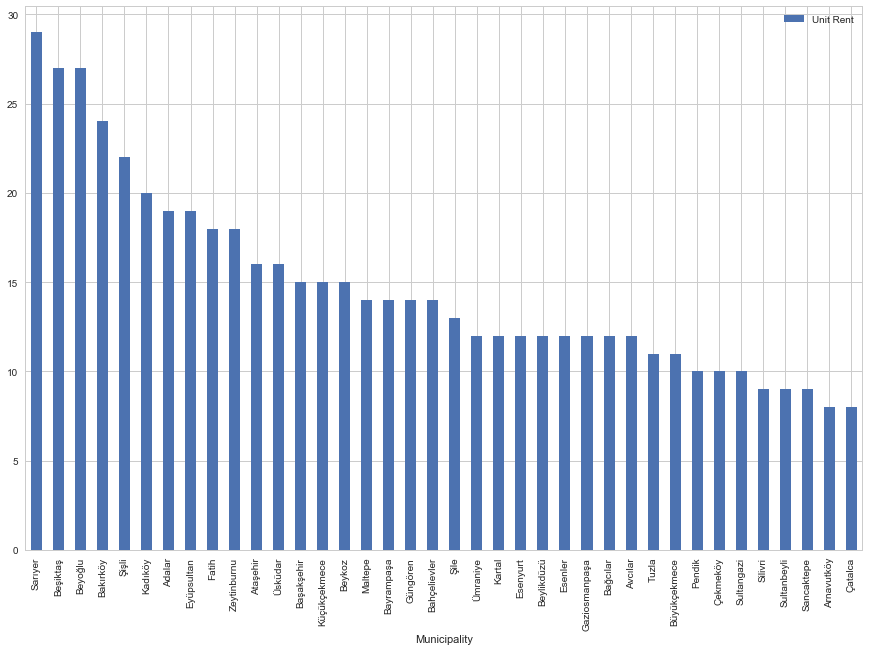

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ist_merged.plot(x = "Municipality", y ="Unit Rent", kind="bar", figsize=(15,10))
print("Volume wighted average rent price in TL per square meter: ")
print( (ist_merged["Unit Rent"] * ist_merged["Population"]).sum()  /  (ist_merged["Population"].sum() ))

In [178]:
rest_per_cat = {}
for ix, val in ist_merged.iterrows():
    for t in range(7,12,1):
        if "restaurant" in ist_merged.iloc[ix,t ].lower():
            if ist_merged.iloc[ix,6] in rest_per_cat:
                rest_per_cat[ist_merged.iloc[ix,6]] = rest_per_cat[ist_merged.iloc[ix,6]] + 1
            else:
                rest_per_cat[ist_merged.iloc[ix,6]] = 1
rest_per_cat

{0: 22, 1: 1, 3: 26}

### Conclusion

#### Category __3__ has the most restaurants as top 5 venues. So we will open our restraurant in a category 3 type location.

If we look at the dataframe sorted by most crowded municipality, we will see the first place with category 3 is __"Ümraniye"__.

__Ümraniye__ is also with average rent of 12 TL/m2, cheaper than Istanbul average which is 14.6 TL/m2.

In addition to that, restaurants are not most common venues listed in __Ümraniye__. This might mean:
1. There are not so many restaurants existing in __Ümraniye__.
2. Or they are not worth/qualified enough to attract people.
---
In either case, this is our chance to test our chef skills for the first time!
We not only expertised in Turkish cusine but also in data science now.
Cooking skills combined with a smart brain would lead into a business full of success and money.
That's a risk worth to take. Let's cook!

---

In [179]:
ist_merged.sort_values(by="Population", ascending=False)

,Municipality,Unit Rent,Population,Unit Rent Per Capita,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Bağcılar,12,757162,1.58487e-05,41.033899,28.857898,0,Café,Gym,Coffee Shop,Turkish Restaurant,Dessert Shop,Hookah Bar,Steakhouse,Arcade,Fast Food Restaurant,Gym / Fitness Center
20,Ümraniye,12,672359,1.78476e-05,41.022269,29.090073,3,Coffee Shop,Bakery,Café,Bookstore,Jewelry Store,Shoe Store,Tea Room,Burger Joint,Restaurant,Turkish Restaurant
13,Küçükçekmece,15,662566,2.26393e-05,41.000214,28.780889,3,Turkish Restaurant,Café,Dessert Shop,Seafood Restaurant,Soup Place,Gym / Fitness Center,Sculpture Garden,Shopping Mall,Electronics Store,Bakery
22,Esenyurt,12,624733,1.92082e-05,41.034240,28.680018,0,Café,Mobile Phone Shop,Hotel,Eastern European Restaurant,Restaurant,Grocery Store,Fast Food Restaurant,Men's Store,Electronics Store,Bistro
18,Bahçelievler,14,571711,2.44879e-05,41.000290,28.863745,0,Café,Dessert Shop,Bakery,Turkish Restaurant,Gym,Gaming Cafe,Pide Place,Cosmetics Shop,Ice Cream Shop,Steakhouse
5,Kadıköy,20,550801,3.63108e-05,40.991572,29.027017,0,Café,Coffee Shop,Seafood Restaurant,Restaurant,Bar,Pub,Nightclub,Theater,Cosmetics Shop,Bookstore
11,Üsküdar,16,529550,3.02143e-05,41.024905,29.017528,0,Café,Coffee Shop,Turkish Restaurant,Turkish Home Cooking Restaurant,Historic Site,Restaurant,Seafood Restaurant,Sporting Goods Shop,Pilavcı,Burger Joint
30,Pendik,10,520486,1.92128e-05,40.876589,29.233342,3,Café,Turkish Restaurant,Fast Food Restaurant,Restaurant,Dessert Shop,Jewelry Store,Fried Chicken Joint,Clothing Store,Art Gallery,Breakfast Spot
24,Esenler,12,468448,2.56165e-05,41.033254,28.890953,0,Café,Gym / Fitness Center,Gym,Soccer Stadium,Turkish Restaurant,BBQ Joint,Bakery,Cocktail Bar,Basketball Court,Steakhouse
25,Gaziosmanpaşa,12,464109,2.5856e-05,41.057526,28.915650,0,Café,Turkish Restaurant,Restaurant,Snack Place,Pizza Place,Cosmetics Shop,Arcade,Steakhouse,Gym,Gym / Fitness Center
